In [43]:
from anthropic import Anthropic
import os
from dotenv import load_dotenv
import ast
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

#Funtions file with unique functions
import functions

In [44]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the API key from environment variables
api_key = os.getenv("ANTHROPIC_API_KEY_AKSHAY")

In [45]:
client = Anthropic(
    # This is the default and can be omitted
    api_key=api_key,
)

In [63]:
requested_design = "The Letter L"

In [64]:
current_coordinates = [[1,1], [1,2], [1,3], [1,4]]

In [65]:
prompt = functions.create_prompt(current_coordinates=current_coordinates, requested_design=requested_design)
print(prompt)


A drone is being used to place building blocks on a grid.
Please read all of the following instructions first.

You will be asked to come up with the drop-off locations for the drone that create a specified design.
The origin of the grid is [0,0] in the bottom left corner and the last point is [4,4] in the top right.
The X axis goes from [0,0] to [4,0]. The Y axis goes from [0,0] to [0,4]. 

You can think of the grid like the pixels of a tv screen, with your job being to decide which pixel to turn on.
The grid currently looks as follows, where "o" is an empty spot (or off pixel) and "x" is a spot that has a existing block (or on pixel):

4 o x o o o
3 o x o o o
2 o x o o o
1 o x o o o
0 o o o o o
  0 1 2 3 4



Any existing points marked with "x" has already been chosen and must be incorporated in the design you will create. 
Make sure these pieces then align with one another to create the design in a logical layout.

Only Integer points are allowed.
You can make the design in any ori

In [66]:
# Define the prompt
prompt = prompt

response = client.messages.create(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="claude-3-5-sonnet-20240620",
)
print(response.content)

[TextBlock(text='{\n    "Design": [\n        {\n            "Title": "The Letter L",\n            "New Coordinates": [\n                [0, 0],\n                [0, 1],\n                [0, 2],\n                [0, 3],\n                [0, 4],\n                [2, 0],\n                [3, 0],\n                [4, 0]\n            ],\n            "Existing Coordinates": [\n                [1, 0],\n                [1, 1],\n                [1, 2],\n                [1, 3],\n                [1, 4]\n            ],\n            "Reasoning": "To create the letter L, I used the existing vertical line at x=1 as the main stem of the L. I then added points to the left of this line (at x=0) to complete the vertical part, and extended the base horizontally to the right (at y=0) to form the bottom of the L. This creates a clear, legible L shape that incorporates the existing blocks and fits within the 5x5 grid."\n        }\n    ]\n}', type='text')]


In [67]:
# Extract the response text
response_text = response.content[0].text
print(response_text)

{
    "Design": [
        {
            "Title": "The Letter L",
            "New Coordinates": [
                [0, 0],
                [0, 1],
                [0, 2],
                [0, 3],
                [0, 4],
                [2, 0],
                [3, 0],
                [4, 0]
            ],
            "Existing Coordinates": [
                [1, 0],
                [1, 1],
                [1, 2],
                [1, 3],
                [1, 4]
            ],
            "Reasoning": "To create the letter L, I used the existing vertical line at x=1 as the main stem of the L. I then added points to the left of this line (at x=0) to complete the vertical part, and extended the base horizontally to the right (at y=0) to form the bottom of the L. This creates a clear, legible L shape that incorporates the existing blocks and fits within the 5x5 grid."
        }
    ]
}


[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [2, 0], [3, 0], [4, 0]]


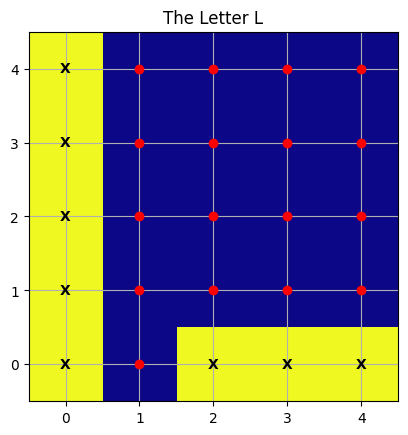

To create the letter L, I used the existing vertical line at x=1 as the main stem of the L. I then added points to the left of this line (at x=0) to complete the vertical part, and extended the base horizontally to the right (at y=0) to form the bottom of the L. This creates a clear, legible L shape that incorporates the existing blocks and fits within the 5x5 grid.


In [68]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Design']:
    title = design['Title']
    coordinates = design['New Coordinates']
    print(coordinates)
    functions.plot_coordinates(title, coordinates)
    print(design['Reasoning'])

In [19]:
grid_representation = functions.create_grid_representation(coordinates=coordinates)
print(grid_representation)

4 o x o x o
3 o o x x o
2 o x o x o
1 o x o x o
0 o o o o o
  0 1 2 3 4

